# Practical Deep-Learning using Pytorch
* project start : 2023-03-23
* project end : 
* wirter : Int29
* github : https://github.com/int29/PDLP
* project description : 처음부터 다시 딥러닝 공부를 하면서 공부한 내용을 정리함.

## Chapter01 : classical artificial neural network

## 01.퍼셉트론(Perceptron) : Artificial neuron의 이해

### (1) MCP 모형 부터 퍼셉트론 까지
퍼셉트론은 1957년 로젠 블릿이 MCP(McCulloch-Pitts)뉴런모형을 기반으로하는 학습알고리즘을 발표하며 탄생하였다. 

로젠 블릿이 차용한 MCP뉴런모형이란 1943년 월터 피츠(Walter Pitts)와 워렌 맥컬러히(Warren McCulloch)가 뉴런이 수상돌기를 통해 전달된 신호가 임계치 이상으로 전달될 때 전기신호를 출력하는것을 수학적으로 표현한 모델을 의미한다. MPC모형에서 뉴런은 0과1의 이진(binary)값을 여러개 입력받을 수 있고 각 입력 신호에 가중치(weight)를 곱해 누적한 값이 임계값(threshold)을 넘으면 1, 그렇지 않으면 0을 반환한다.
<br><br><br>

<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_01.png?raw=true" width="600">
    <span>[그림01-01]</span>
</div>

퍼셉트론은 이러한 선형모형에 활성화 함수를 적용하여 출력값을 계산하고 최적 가중치($w$)와 편향($b$)을 학습하는 퍼셉트론알고리즘을 발표하였다.


편향($b$,bias)을 더하는 
<br><br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_02.png?raw=true" width="900">
    <span>[그림01-02]</span>
</div>

### (2-1) 퍼셉트론의 가중치와 편향 
퍼셉트론은 복수의 입력에 개별 가중치를 곱하고 편향을 더한다. 때문에 가중치($w$)에 따라 특정 입력이 활성화에 강하게 영향을 미칠수도 반대로 적게 미치게될 수도 있다. 또한 편향($b$)을 더해주기 때문에 이 편향값에 따라 약한 신호에서도 활성화가 잘될지(민감) 아니면 강한신호에도 활성화가 잘 되지 않을지(둔감)하게 될 수도 있다. 

* 가중치($w$) : 여러 입력 신호 중 출력신호에 영향을 주는 중요도를 결정한다.
* 편향($b$) : 활성함수가 입력신호에 대해 얼마나 민감하게 반응할지 결정한다.

입력신호는 $x=[1,1,1]$와 같고 각 입력신호에 전달되는 가중치가 $w=[0.1,0.2,10]$이라면 활성함수에 전달되는 값은 
$1\times0.1 + 1\times0.2 + 1\times10$이 될것이다. 따라서 3번째 신호의 가중치가 10이기 때문에 활성화여부에 가장 많은 영향을 주는것을 직관적으로 알 수 있다.

이 때 임계치가 $\theta=15$라면 위 입력신호의 가중합은 10.3이기 때문에 활성화 되지 않을것이다. 하지만 편향 $b=5$ 라면 퍼셉트론의 식에 따라 입력신호의 가중합에 편향5가 더해져 15.5가 되어 임계치 15를 넘기 때문에 이번에는 활성화된 값인 1을 반환할 것이다. 만약 $b=15$라면 가중치가 어떠하든 입력신호가 어떠하든 임계치보다 무조건 높기 때문에 무조건 1을 반환하게 될것이다. 즉 편향($bias$)가 입력신호에 얼마나 민감하게 반응할지를 결정하는 것을 알 수 있다.

### (2-2) 활성화 함수(activation function)
활성화 함수(activation function)는 인공신경망에서 입력 신호의 총합을 출력값으로 변환하는 함수이다. 즉 퍼셉트론이 입력값을 계산한 값을 binary값으로 변경해주는 것이다. 가장 기본적인 활성함수는 계단함수(Step Function)이고 이 계단함수를 통해서 작동에 대해 살펴보자

계단함수는 매우 간단하다. 계단함수로 입력되는 값이 임계값($\theta$)보다 높으면 1을 출력하고, 낮으면 0을 출력한다. 위 예시에서 임계값이 15이기 때문에 아래와 같이 표현할 수 있다.
<br><br>
<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_05.png?raw=true" width="400">
    <span>[그림01-03]</span>
</div>

실제 사용가능한 활성화함수는 아래와 같이 매우 다양하며 포함되지 않은 함수들도 존재한다. 만약 맞는 함수가 없다면 직접 만들 수도 있다.

<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_04.png?raw=true" width="400">
    <span>[그림01-04]</span>
</div>

### (2-3) 퍼셉트론의 학습알고리즘

퍼셉트론은 학습 알고리즘으로 주어진 데이터와 레이블값을 잘 맞추도록 퍼셉트론 파라미터인 가중치와 편향을 자동으로 학습한다. 퍼셉트론은 Gradient Descent 방식을 통해서 

## 02. 퍼셉트론(Perceptron) 구현
### (1) 파이썬을 통한 AND/OR/NAND 구현
파이썬을 통해 계단함수를 활성함수로 사용하는 퍼셉트론을 생성해보고 AND / OR / NAND 문제를 해결해보자
AND / OR / NAND 문제는 $x_{1}$, $x_{2}$ 두 개의 입력값에 따라 하나의 출력 $y$를 어떻게 내보낼것인가에 대한 문제이다.  신호를 1과 0으로 표현하고, 입력하는 신호를 처리하는 방법에 따라서 출력 $y$에 신호를 1로 내보낼것인지 0으로 내보낼것인지를 결정한다.

<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_06.png?raw=true" width="700">
    <span>[그림01-05]</span>
</div>

3가지 논리게이트를 입력과 출력관계의 2차원 좌표평면상으로 표현하면 그림[01-06]의 오른쪽과 같다.
우리의 목표는 2차원 좌표평면상에 $(x_{1},x_{2})=\{(0,0),(0,1),(1,0),(1,1)\}$ 4개의 점이 존재할 때 정의한 논리게이트에 맞는 결과를 반환하는 퍼셉트론을 파이썬으로 개발하는 것이다. 예를들면 AND게이트는 $\{(0,0),(0,1),(1,0),\}$ 3개의 점은 0으로, $(1,1)$ 1개의 점은 1로 출력하는 퍼셉트론 알고리즘을 학습하고 구현하는 것이다.

<div align="center">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_07.png?raw=true" width="500">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_08.png?raw=true" width="500">
    <img src="https://github.com/int29/PDLP/blob/main/ch01_classical_neural_network/01_09.png?raw=true" width="500">
    <span>[그림01-06]</span>
</div>


/var/folders/rb/08hb3q_s6n76kv1h3vkc20lh0000gn/T/ipykernel_31870/1560978546.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
MovieWriter imagemagick unavailable; using Pillow instead.


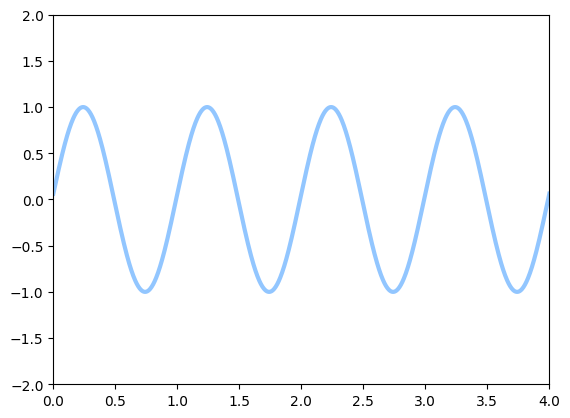

In [119]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [102]:
import numpy as np

def perceptron(x, w, b, logic):
    """
    파라미터
    ----------
    X : {array-like}, shape = [입력횟수, 게이트수] : 입력값
    Exameples : AND문제의 경우 총 4번의 신호를 전송하고 2개의 게이트를 통해 입력하기 때문에 입력값은 shape는 [4,2]가 된다.
    array([[0, 0],
           [0, 1],
           [1, 0],
           [1, 1]])
       
    w : array-like, shape = [입력횟수, 게이트수] : 가중치
    Exameples : AND문제의 경우 총 4번의 신호를 전송하고 각 신호마다 가중치가 필요하기 때문에 shape는 [2,1]가 된다
    array([[0.5],
           [0.5]])
    
    b : {int} : 퍼셉트론의 편향(bias) 값
    
    출력값
    -------
    y : {int} 1 혹은 0 값을 출력함
    """
    
    # 입력벡터 x와 가중치벡터 w를 곱한값에 편향을 더하는 과정
    y =  np.sum(w.T*x + b, axis=1, keepdims=True) 
    
    
    # 활성화 함수 (계단함수)
    # 입력한 값이 1이면 1 아니면 0으로 반환함.
    
    if logic == 'AND': 
        result = np.where(y>=1 ,1,0)
    elif logic == 'OR':
        result = np.where(y>=0.5 ,1,0)
    elif logic == 'NAND':
        result = np.where(y < 1 ,1,0)
    return result

In [103]:
## 데이터 정의
# 입력값
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 가중치
w = np.array([[0.5],[0.5]])

# 편향
b = 0

In [107]:
# 결과 AND
perceptron(x, w, b, "AND")

array([[0],
       [0],
       [0],
       [1]])

In [108]:
# 결과 OR
perceptron(x, w, b, "OR")

array([[0],
       [1],
       [1],
       [1]])

In [109]:
# 결과 NAND
perceptron(x, w, b, "NAND")

array([[1],
       [1],
       [1],
       [0]])

위와 같이 동일한 입력값에 대해 각 논리게이트에 따른 출력값이 분류되는것을 확인할 수 있다. 그런데 우리가 구현한 퍼셉트론은 가중치와 편향을 0.5와 0으로 고정하였던 결과였다. 실제 퍼셉트론은 학습알고리즘으로 데이터에 따라서 파라미터인 가중치와 편향을 자동으로 조정해야 하기 때문에 데이터에 맞는 퍼셉트론 파라미터인 가중치와 편향을 자동으로 학습하는 학습알고리즘에 대해서 살펴보자

### 퍼셉트론 학습알고리즘

In [ ]:

\begin{equation}
  f(x)=\left\{
  \begin{array}{@{}ll@{}}
    0, & \text{if}\ & w_{1}x_{1} + w_{2}x_{2} + ... w_{n}x_{n} + b < \theta \\
    1, & \text{if} \ & w_{1}x_{1} + w_{2}x_{2} + ... w_{n}x_{n} + b >= \theta \\
  \end{array}\right.
\end{equation} 


\begin{align*}
  f(x) &= \sum_{i=1}^{N} w_{i}x_{i} +b
\end{align*}

#### 인용출처
$^{[1]}$ : 파이썬 머신러닝(2016),세바스티안 라슈카,지앤선,PACKT, 17p~18p

<원문>

워런 맥컬럭과 월터 피츠가 맥컬럭-피츠(MCP) 뉴런이라고 불리는 단순화된 뇌 세포의 개념을 1943년 처음 발표하면서 시작되었다.(A Logical Calculus of the Ideas Immanent in Nervous Activity by W. S. McCulloch and W. Pitts, Bulletin of Mathematical Biophysics, 5(4): 115-133, 1943), 메컬렉과 피츠는 이러한 신경세포를 바이너리 출력을 갖는 간단한 논리 게이트로 설명했다. 복수의 신호가 수상돌기에 도달하면 세포체에 통합된다. 그리고 신호가 누적되어 특정 임계치를 초과하면 출력 신호가 생성되고 축색돌기를 지나간다.

**참고문헌**
1. 파이썬 머신러닝(2016),세바스티안 라슈카,지앤선,PACKT
2. 밑바닥부터 시작하는 딥러닝(2021), 사이토 코기, 한빛미디어
3. Machine Learning with R Second Edition(2015), Brett Lantz, Packt

#### 이미지 및 자료 출처
[그림01-01] : 비상학습백과 중학교 과학 ② 뉴런(https://terms.naver.com/entry.naver?docId=3379489&cid=47339&categoryId=47339)<br>
[그림01-05] : Machine Learning with R Second Edition(2015), Brett Lantz, Packt<br>